In [1]:
#standard python imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", font_scale=1.4,
              rc = {'xtick.bottom': True, 'xtick.top': True, 'ytick.left': True, 'ytick.right': True,
                   'axes.grid': True,  'axes.edgecolor': '.15'})

In [2]:
#setup the particular cosmology parameters you want
from astropy.cosmology import Planck18
from astropy.cosmology import WMAP9

#we also need to use astropy units to avoid errors. Good practice anyway
from astropy import units as u

In [3]:
from astropy.cosmology import FlatLambdaCDM, LambdaCDM, FlatwCDM

### 1. Check if stuff work

#### 1.1. Planck18
The Planck18 cosmology


In [4]:
#test redshift 4 
#notice it will have the units of Megaparsecs (Mpc)
Planck18.luminosity_distance(4)

<Quantity 36659.04730931 Mpc>

In [5]:
Planck18.H0

<Quantity 67.66 km / (Mpc s)>

In [6]:
Planck18.Om

<bound method FLRW.Om of FlatLambdaCDM(name="Planck18", H0=67.66 km / (Mpc s), Om0=0.30966, Tcmb0=2.7255 K, Neff=3.046, m_nu=[0.   0.   0.06] eV, Ob0=0.04897)>

#### 1.2. WMAP9
The WMAP1 cosmology (which has a larger Hubble Constant but less dark matter than the Planck Results)


In [7]:
#different cosmology test redshift 4
#note that WMAP9 is very similar to Planck18 but not identical.  Based on two different satellite's data for CBR
WMAP9.luminosity_distance(4)

<Quantity 36722.22316759 Mpc>

#### 1.3. $\Lambda = 0 $
A flat matter dominated universe with zero cosmological constant


In [8]:
Lambda0 = FlatLambdaCDM(name='myLambda0', H0=67.7, Om0=1)

In [9]:
#check cosmological constant is zero
Lambda0.Ode0

0.0

#### 1.4. $\Omega_m = 0 $, $\Lambda = 0 $
An empty universe where Omega matter=0 and zero cosmological constant.

In [10]:
Om0Lambda0 = LambdaCDM(name='myOm0Lambda0', H0=67.7, Om0=0, Ode0=0)

#### 1.5. w=-0.9 
A flat universe with a dark energy equation of state 𝑤 = −0.9. (A standard cosmological constant corresponds to 𝑤 = −1.0 )


In [11]:
#a more complicated case is a non-standard cosmology with a different equation of state w
#Following the example in https://docs.astropy.org/en/stable/cosmology/index.html
#
# homework assignment did not tell us hubble constant, Omega, values, so I'll try to match the Planck18 in cell above
W9 = FlatwCDM(name='myW0', H0=67.7, Om0=0.310, w0=-0.900)

#### 1.6. Benchmark Model (Ryden) 

In [12]:
#The Ryden book's Benchmark model would also be useful in various homeworks. Let's show how to set it up:
Benchmark = FlatLambdaCDM(H0=68,Om0=0.31)
#Let's get angular diameter distance for z=5 as in Quasar Variability homework problem.
Benchmark.angular_diameter_distance(5)

<Quantity 1319.63176912 Mpc>

### 2. Setting up plots

In [13]:
#Let's define the absolute magnitude of a Supernova in case we ever wanted to use a different value or understand this code.
SN_absmag = -19.0 *u.mag

In [14]:
#set up redshifts. logarithmic spacing seems appropriate for our problem
z_redshift=np.logspace(-2,0,num=200)
#then again, maybe linear wuold be just as good.  In any case, 200 gives lots of points for our plots.

In [15]:
#we could use the luminosity_distance function and our own equation for distance modulus
mag_sn_p18 = SN_absmag + Planck18.distmod(z_redshift)  
mag_sn_wmap9 = SN_absmag + WMAP9.distmod(z_redshift)  
mag_sn_lambda0 = SN_absmag + Lambda0.distmod(z_redshift) 
mag_sn_om0lambda0 = SN_absmag + Om0Lambda0.distmod(z_redshift) 
mag_sn_w9 = SN_absmag + W9.distmod(z_redshift) 
mag_sn_benchmark = SN_absmag + Benchmark.distmod(z_redshift) 

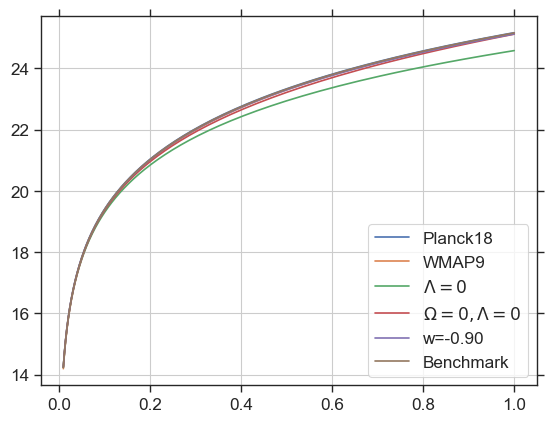

In [16]:
plt.plot(z_redshift,mag_sn_p18,label='Planck18')
plt.plot(z_redshift,mag_sn_wmap9,label='WMAP9')
plt.plot(z_redshift,mag_sn_lambda0,label='$\Lambda = 0$')
plt.plot(z_redshift,mag_sn_om0lambda0,label='$\Omega=0, \Lambda = 0$')
plt.plot(z_redshift,mag_sn_w9,label='w=-0.90')
plt.plot(z_redshift,mag_sn_benchmark,label='Benchmark')
plt.legend()
plt.show()

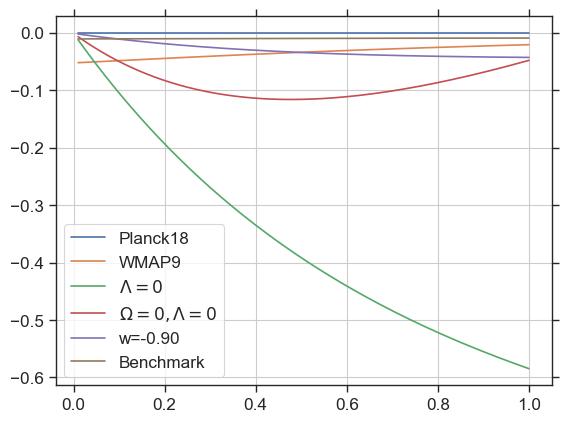

In [17]:
#So far this seems very unhelpful as the plots are too close.  Let's try to plot the difference
magdiff_p18 = mag_sn_p18 - mag_sn_p18 
magdiff_wmap9 = mag_sn_wmap9 - mag_sn_p18 
magdiff_lambda0 = mag_sn_lambda0 - mag_sn_p18 
magdiff_om0lambda0 = mag_sn_om0lambda0 - mag_sn_p18 
magdiff_w9 = mag_sn_w9 - mag_sn_p18 
magdiff_benchmark = mag_sn_benchmark - mag_sn_p18 



plt.plot(z_redshift,magdiff_p18,label='Planck18')
plt.plot(z_redshift,magdiff_wmap9,label='WMAP9')
plt.plot(z_redshift,magdiff_lambda0,label='$\Lambda = 0$')
plt.plot(z_redshift,magdiff_om0lambda0,label='$\Omega=0, \Lambda = 0$')
plt.plot(z_redshift,magdiff_w9,label='w=-0.90')
plt.plot(z_redshift,magdiff_benchmark,label='Benchmark')
plt.legend()
plt.show()